# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
The dataset contains **1500 rows and 8 columns** before cleaning. I have validated all the columns against the criteria in the dataset table:
- owned: Same as description without missing values. Values are 1 or 0
- make_model: Same as description without missing values. 6 models
- review_month: Should be English short format. Some values had dates and '-'. Removed using regular expressions. Now values are the 12 months in short form
- web_browser:  Same as description. 150 missing values changed to unknown. 6 browsers
- reviewer_age:  Converted  from object data type to int. 105 missing value. Replaced with average age of 32
- primary_use:  Same as description without missing values. 2 uses
- value_for_money: Same as description without missing values. 10 different ratings 
- overall_rating: Same as description without missing values. All values are between 0 and 25


### Original Dataset  

In [92]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re #regular expression
data = pd.read_csv('electric_bike_ratings_2212.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


### Validating Data

#### Converting reviewer_age column

reviewer_age is suppose to be an int, but it is currently an object so it will have to be changed

In [93]:
data['reviewer_age'].value_counts() ## there are 105 "-", will show up as na when data type is changed
data['reviewer_age'] = pd.to_numeric(data['reviewer_age'], errors='coerce').astype('Int64')
data['reviewer_age'].info() #now there are 105 null values
age_mean = data['reviewer_age'].mean().astype('int')
data['reviewer_age'].fillna(value=age_mean,inplace=True)
data['reviewer_age'].info() #no more missing values

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: reviewer_age
Non-Null Count  Dtype
--------------  -----
1395 non-null   Int64
dtypes: Int64(1)
memory usage: 13.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: reviewer_age
Non-Null Count  Dtype
--------------  -----
1500 non-null   Int64
dtypes: Int64(1)
memory usage: 13.3 KB


#### Checking Object Data

In [94]:
cat = ['make_model','review_month','web_browser','primary_use','value_for_money']
for column in cat:
  print(data[column].value_counts())

Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64
Chrome     698
IE         239
Firefox    233
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64
5/10     387
6/10     323
4/10     315
3/10     183
7/10     167
2/10      53
8/10      52
1/10      11
9/10       8
10/10      1
Name: value_for_money, dtype: int64


#### Cleaning review_month

review_month should only have 12 values (Jan, Feb etc)

In [95]:
# function to remove numbers and hyphens from a string
def remove_numbers_and_hyphens(s):
    return re.sub(r'[\d-]+', '', s)

# apply the function to the review_month column
data['review_month'] = data['review_month'].apply(remove_numbers_and_hyphens)

#### Cleaning web_browser

Filling in blank web_browser with 'unknown'

In [96]:
data['web_browser'].fillna(value='unknown',inplace=True)

### Validate Numerical Data

In [97]:
data['reviewer_age'].describe() #looks good, no one is an improbable age. lower limit of 16 is correct

count      1500.0
mean       32.556
std      9.876769
min          16.0
25%          24.0
50%          32.0
75%          41.0
max          50.0
Name: reviewer_age, dtype: Float64

In [98]:
data['overall_rating'].describe() #values fall within 0-25 range


count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64

## Task 2


### Inspecting the Owned variable

Looking at the variable 'ownership', it appears that the majority of the reviews were provided by people who own Electric Mopeds. Specifically, nearly 900 reviewers owned electric mopeds, while close to 600 did not. This means that the data is unbalanced.

610 Reviewers do not own a moped 
 890 Reviewers do own a moped


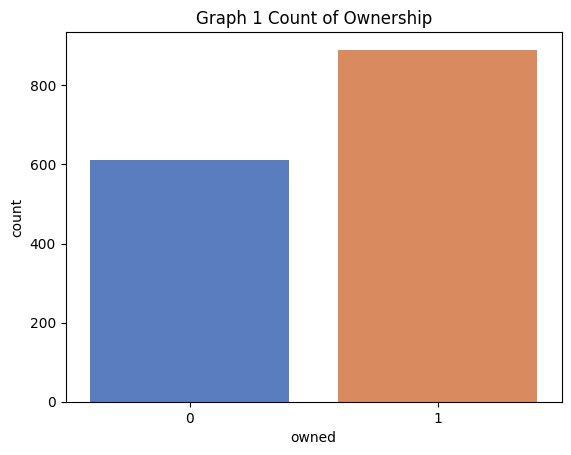

In [99]:

sns.set_palette('muted')
sns.countplot(x='owned',data=data).set(title='Graph 1 Count of Ownership')
d=data['owned'].value_counts()
print(d[0], 'Reviewers do not own a moped','\n',d[1],'Reviewers do own a moped')




## Task 3

Our target variable is overall_rating. Based on Graph 2, the majority of reviews fall within the range of 18 to 20. In Graph 3, we observe that the median rating is slightly above 18. Additionally, our lowest review rating is 11.69 while our highest review rating is 22.76.It is a multimodal distribution.

[Text(0.5, 1.0, 'Graph 2 Distribution of Overall Rating')]

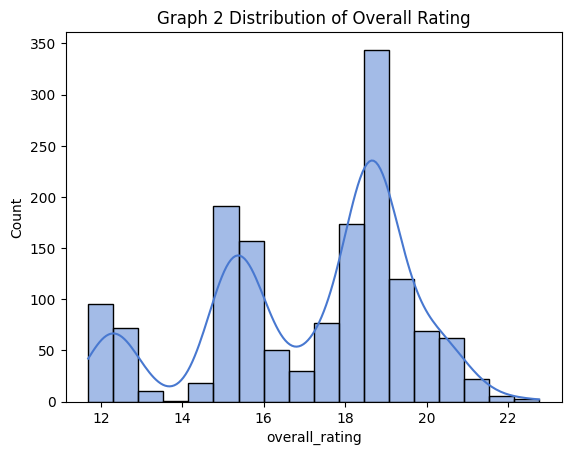

In [100]:
sns.histplot(x='overall_rating',data=data,kde=True).set(title='Graph 2 Distribution of Overall Rating')

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64

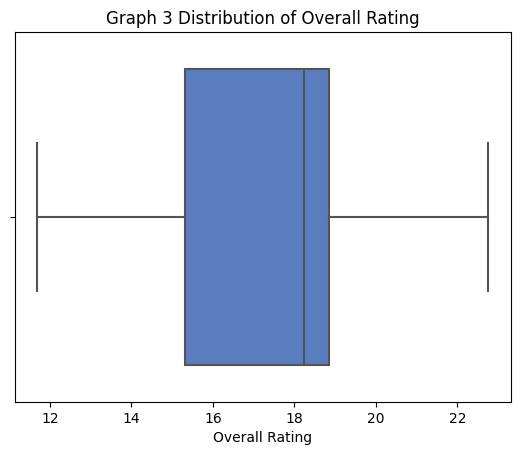

In [101]:
sns.boxplot(x='overall_rating', data=data).set(title='Graph 3 Distribution of Overall Rating',
                                               xlabel='Overall Rating')
data['overall_rating'].describe() 


## Task 4

### Inspecting the Relationship between Overall Rating and Target Variable(owned)

From Graph 4, it appears that those who own electric mopeds typically provide more positive overall feedback. However, the owners' reviews have a large range.

[Text(0.5, 1.0, 'Graph 4 Distribution of Overall Rating by Ownership'),
 Text(0.5, 0, 'Ownership'),
 Text(0, 0.5, 'Overall Rating')]

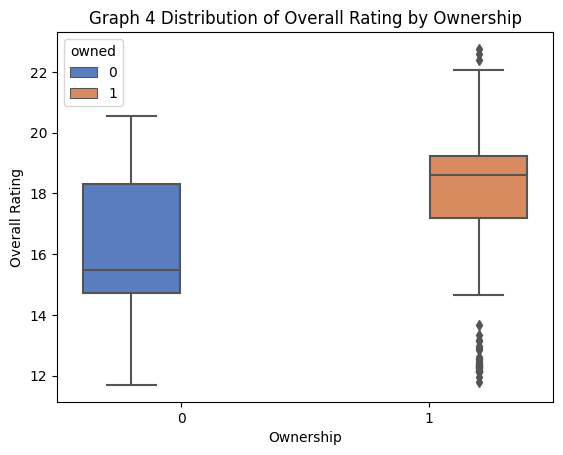

In [102]:

sns.boxplot(x='owned', y='overall_rating', data=data, hue='owned').set(title='Graph 4 Distribution of Overall Rating by Ownership',
                                                                       xlabel='Ownership',
                                                                       ylabel='Overall Rating')

## Task 5

Predicting whether a review came from an owner or not is a **classification problem in machine learning**. 

### Getting data ready for machine learning

In [103]:
#import ML models and peformance metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [104]:
#adjusting value_for_money from a string to a decimal format
data['value_for_money'] = data['value_for_money'].str.split('/', expand=True)[0].astype(float) / 10
#getting features 
features = data.drop(columns='owned')
#getting dummies for categorical columns 
X = pd.get_dummies(features, columns=['make_model','review_month','web_browser','primary_use'])
y = data['owned']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1992)

## Task 6

### Baseline Model - Logistic Regression Model

In [106]:
# Create a Logistic Regression model
logreg = LogisticRegression()
# Fit the model to the data
logreg.fit(X_train, y_train)
# Predict on the data
log_predictions = logreg.predict(X_test)

## Task 7

### Comparision Model - Random Forest Classification

In [107]:
#find the best hyperparameters for the Random Forest Classification 
# Define the hyperparameters and their values to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'random_state': [1, 2, 3]
}

# Create a Random Forest Classifier object
rfc = RandomForestClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'n_estimators': 300, 'random_state': 3}


In [108]:
# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=300,max_depth=5, random_state=3)
# Fit the model to the data
rfc.fit(X_train,y_train)
# Predict on the data
rfc_predictions = rfc.predict(X_test)

## Task 8

I have chosen the **Logistic Regression model** as my baseline model because it is a suitable option for predicting binary output variables, such as whether a reviewer owns an electric moped. As for the comparison model, I have opted for the **Random Forest Classifier**. This model utilizes multiple decision trees to enhance the accuracy of predictions and is ideal when predicting categorical output variables, like whether a reviewer owns an electric moped.

## Task 9

### Evaluating Logistic Regression model

I have chosen  **AUC-ROC Score** to evaluate the models because it is a commonly used evaluation metric for binary classification models, particularly for imbalanced datasets. It measures the ability of the model to distinguish between the positive and negative classes by calculating the area under the receiver operating characteristic (ROC) curve. This curve is a graphical representation of the trade-off between the true positive rate and false positive rate  of a binary classifier as the threshold for classification is varied.

In [109]:
from sklearn.metrics import roc_auc_score
# calculate the ROC AUC
auc_roc_log = roc_auc_score(y_test, log_predictions)
print("Logistic Regression model AUC-ROC score:", auc_roc_log)

Logistic Regression model AUC-ROC score: 0.7246791727562114


### Evaluting Random Forest Classifier

In [110]:
auc_roc_rfc = roc_auc_score(y_test, rfc_predictions)
print("Random Forest Classifier AUC-ROC score:", auc_roc_rfc)

Random Forest Classifier AUC-ROC score: 0.7255400508518689


## Task 10

The AUC-ROC score ranges from 0.0 to 1.0, where a score of 1.0 indicates a perfect classifier and a score of 0.5 indicates a random classifier.
Therefore the **Random Forest Classifier** performed better than the Logistic Regression Model.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam